In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [68]:
df = pd.read_csv('/content/covid19_casos_brasil.csv')
df

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353908,NaN,43.0,2020-07-12,29,11377239.0,True,False,39240,344.89914,2020-07-12,0.0245,962,125,state,RS,520,19
353909,NaN,42.0,2020-07-12,29,7164788.0,True,False,43031,600.59000,2020-07-12,0.0115,497,123,state,SC,1005,12
353910,NaN,28.0,2020-07-12,29,2298696.0,True,False,37631,1637.05858,2020-07-12,0.0261,984,121,state,SE,1585,30
353911,NaN,35.0,2020-07-12,29,45919049.0,True,False,371997,810.11477,2020-07-12,0.0480,17848,139,state,SP,5107,146


In [69]:
cidades = ['Joinville', 'Curitiba', 'Florianópolis', 'Porto Alegre', 'São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Vitória']
df_selecionado = df.loc[df['city'].isin(cidades)]

In [70]:
df_selecionado

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0000,0,4,city,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0000,0,5,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352063,Rio de Janeiro,3304557.0,2020-07-12,29,6718903.0,True,False,64110,954.17362,2020-07-12,0.1140,7310,129,city,RJ,8,8
352605,Porto Alegre,4314902.0,2020-07-12,29,1483771.0,True,False,3928,264.73088,2020-07-12,0.0400,157,124,city,RS,16,5
352842,Florianópolis,4205407.0,2020-07-12,29,500973.0,True,False,2064,411.99825,2020-07-12,0.0126,26,123,city,SC,23,0
352892,Joinville,4209102.0,2020-07-12,29,590466.0,True,False,3431,581.06648,2020-07-12,0.0163,56,122,city,SC,46,2


In [71]:
# Extrair os anos da coluna 'date'
anos = df['date'].str.extract(r'(\d{4})')

# Contar os valores únicos dos anos
contagem_anos = anos[0].nunique()

# Verificar se todos os anos são iguais a 2020
todos_anos_2020 = all(anos[0] == '2020')

print("Número de anos únicos:", contagem_anos)
print("Todos os anos são 2020?", todos_anos_2020)


Número de anos únicos: 1
Todos os anos são 2020? True


In [72]:
df_selecionado['date']

0         2020-02-25
2         2020-02-26
4         2020-02-27
6         2020-02-28
8         2020-02-29
             ...    
352063    2020-07-12
352605    2020-07-12
352842    2020-07-12
352892    2020-07-12
353684    2020-07-12
Name: date, Length: 995, dtype: object

In [73]:
df_selecionado['date'] = pd.to_datetime(df_selecionado['date'])

<ipython-input-73-3bc17397ad09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['date'] = pd.to_datetime(df_selecionado['date'])


In [74]:
# Criando um dicionário para armazenar os DataFrames separados por cidade
dfs_por_cidade = {}
rotulo_cidade = {}

# Iterando sobre os grupos criados com base na coluna 'city'
for cidade, dados_cidade in df_selecionado.groupby('city'):
    # Obtendo a primeira letra da cidade e criando o nome do DataFrame
    nome_df = f"df_{cidade.lower()[0]}"
    # Armazenando cada DataFrame separado no dicionário
    dfs_por_cidade[nome_df] = dados_cidade
    rotulo_cidade[nome_df] = cidade

## transformando a coluna 'Date' no formato datetime

In [75]:
months = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dec': 12}
dfs = {}

for city in dfs_por_cidade:
  dfs[city] = {}
  for month in months:
    dfs[city][month] = dfs_por_cidade[city][dfs_por_cidade[city]['date'].dt.month == months[month]]

In [76]:
death_per_cities = {}

for city in dfs:
  death_per_cities[city] = {}
  for month in months:
    death_per_cities[city][month] = sum(dfs[city][month]['new_deaths'])

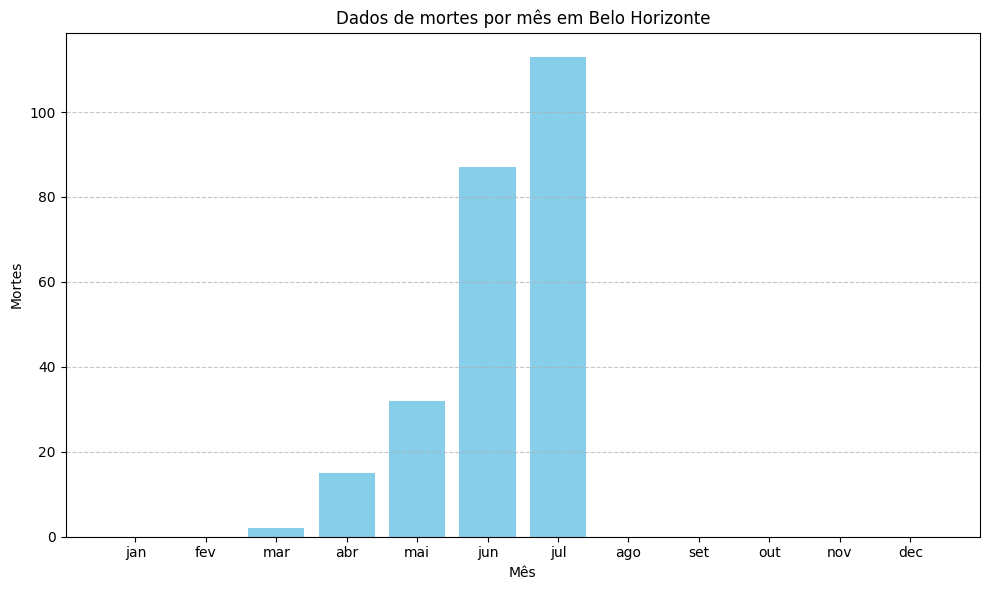

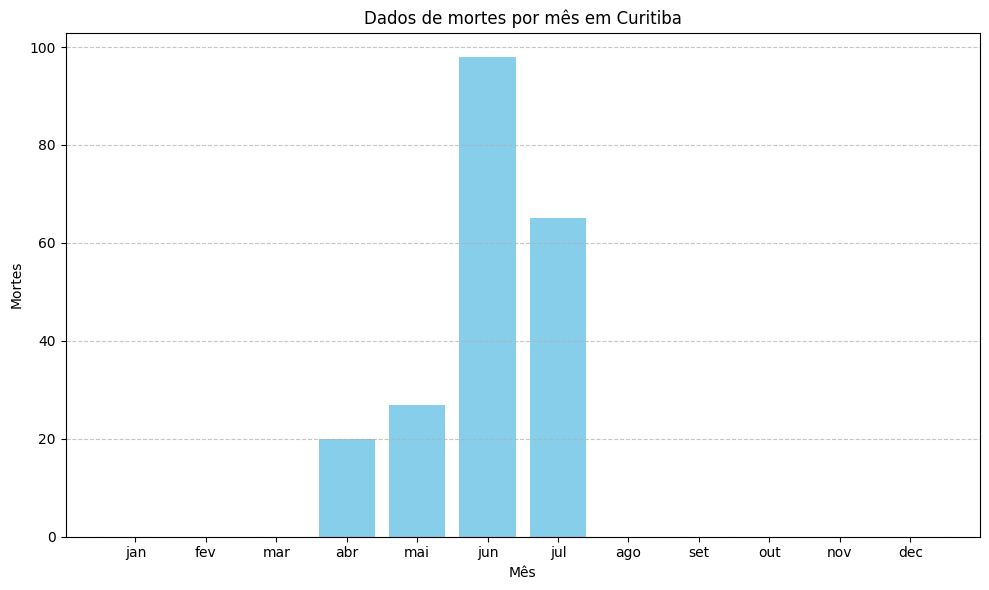

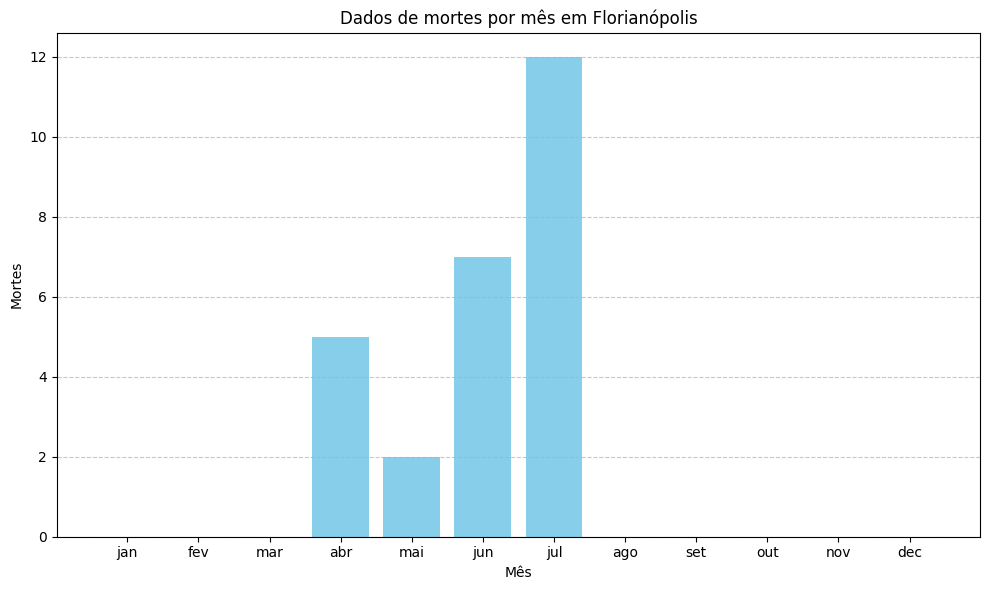

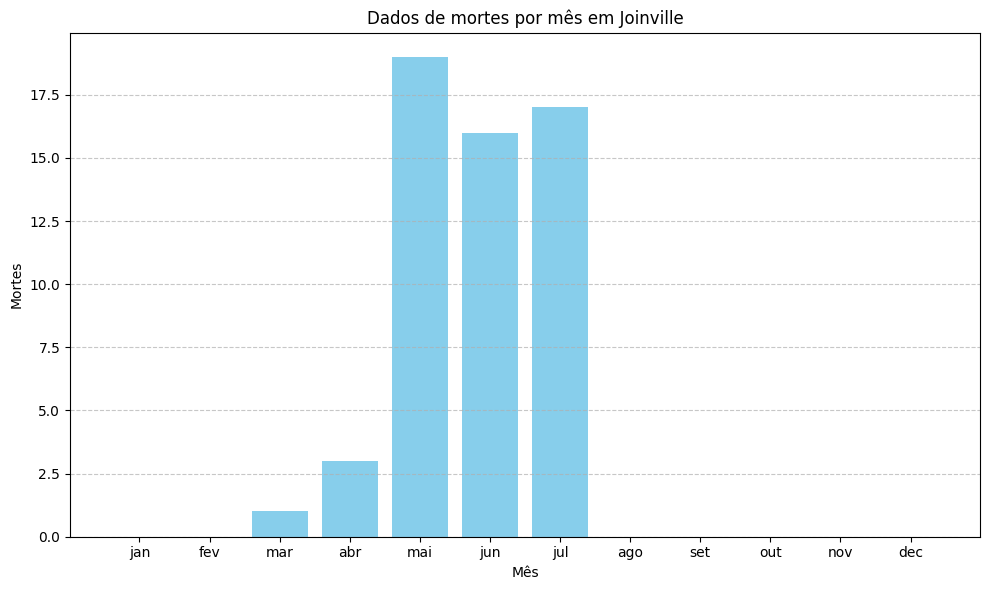

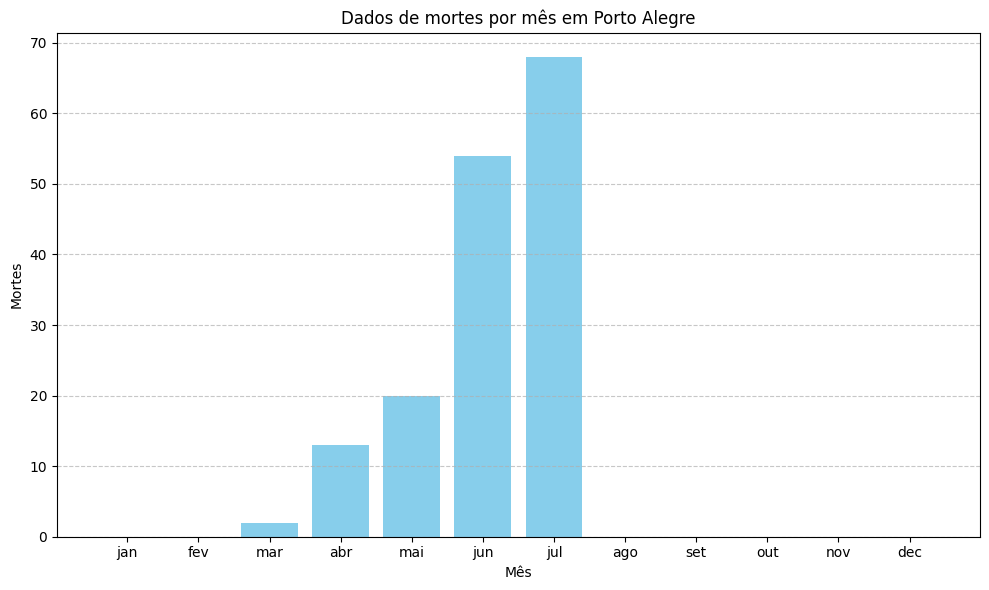

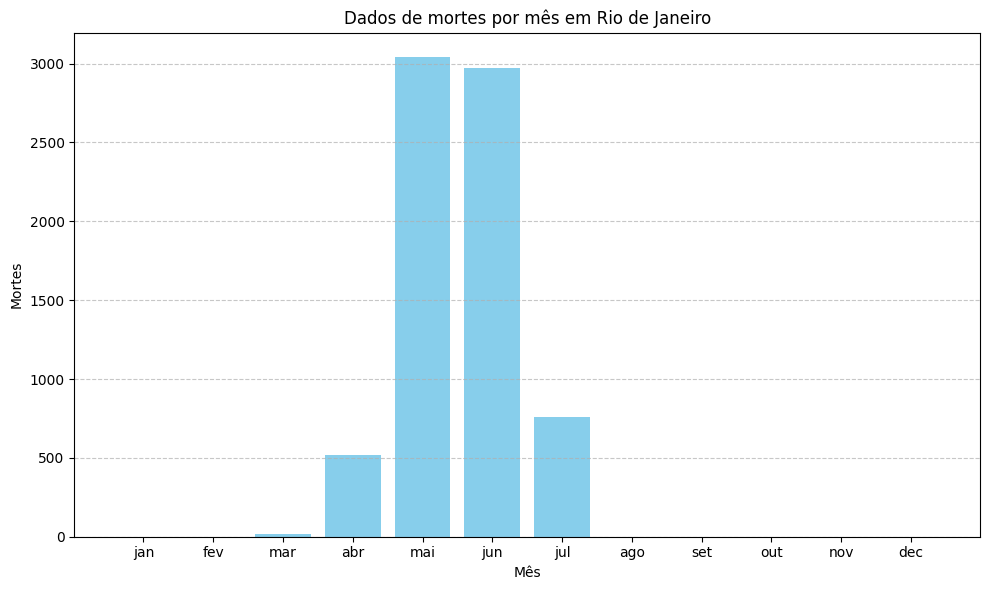

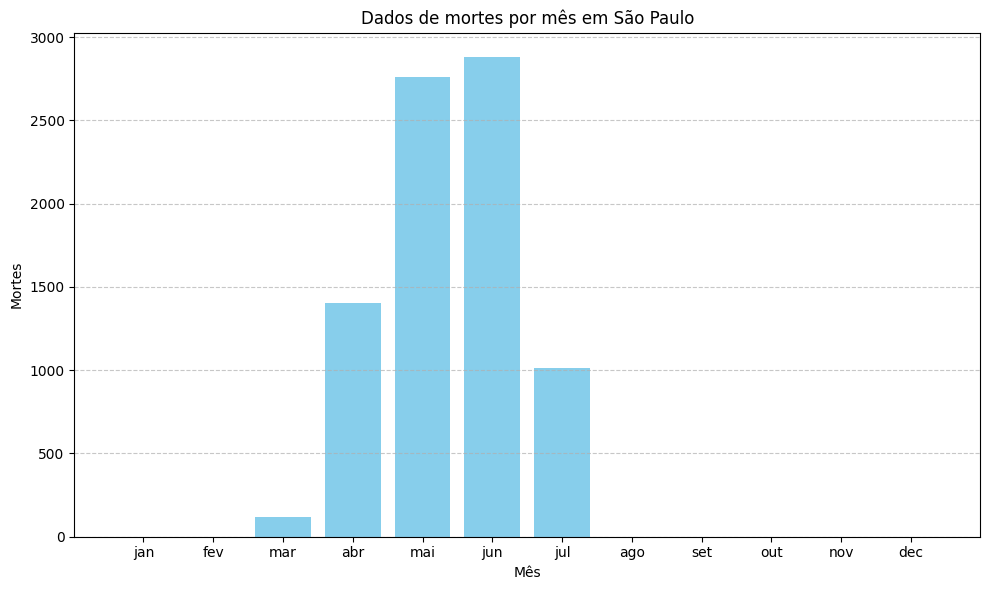

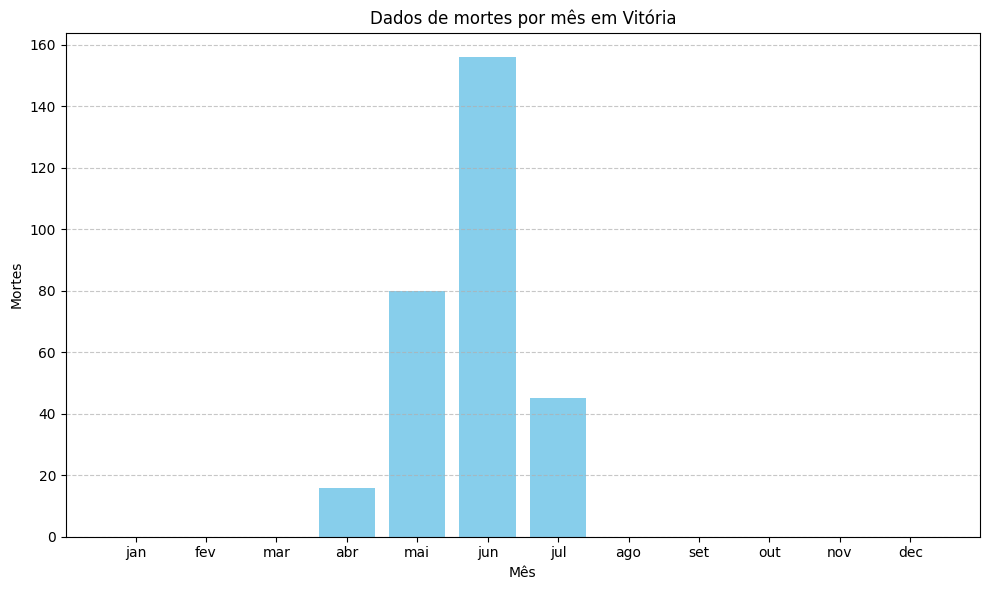

In [77]:

for city in death_per_cities:

  death_per_month = death_per_cities[city]

  meses = list(death_per_month.keys())
  valores = list(death_per_month.values())

  plt.figure(figsize=(10, 6))
  plt.bar(meses, valores, color='skyblue')
  plt.title(f'Dados de mortes por mês em {rotulo_cidade[city]}')
  plt.xlabel('Mês')
  plt.ylabel('Mortes')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [78]:
cases_per_cities = {}

for city in dfs:
  cases_per_cities[city] = {}
  for month in months:
    cases_per_cities[city][month] = sum(dfs[city][month]['new_confirmed'])

In [79]:
maxValue = 0
for city in cases_per_cities:
    values = list(cases_per_cities[city].values())
    if max(values) > maxValue: maxValue = max(values)

In [ ]:
for city in cases_per_cities:

  cases_per_month = cases_per_cities[city]

  meses = list(cases_per_month.keys())
  valores = list(cases_per_month.values())

  plt.figure(figsize=(10, 6))
  plt.bar(meses, valores, color='skyblue')
  plt.title(f'Dados de casos confirmados de covid por mês em {rotulo_cidade[city]}')
  plt.xlabel('Mês')
  plt.ylabel('Casos')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  # plt.ylim(0,maxValue * 1.1)
  plt.show()

In [81]:
tot_death_cities = {}
tot_cases_cities = {}

for city in death_per_cities:
  tot_death_cities[city] = sum(death_per_cities[city].values())
  tot_cases_cities[city] = sum(cases_per_cities[city].values())

print(tot_death_cities)
print(tot_cases_cities)


{'df_b': 249, 'df_c': 210, 'df_f': 26, 'df_j': 56, 'df_p': 157, 'df_r': 7310, 'df_s': 8176, 'df_v': 297}
{'df_b': 10618, 'df_c': 8431, 'df_f': 2064, 'df_j': 3431, 'df_p': 3928, 'df_r': 64110, 'df_s': 151365, 'df_v': 9029}
